# Data Science Skills Visualization

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [7]:
df = pd.read_csv("wd_scraped_data.csv")
df.head()

,Unnamed: 0,Skill,Category,total_jobs,indeed,simply,career
0,0,javascript,programming,33411,5141,4001,4787
1,1,python,programming,33411,1683,1350,2233
2,2,java,programming,33411,2359,1883,5192
3,3,scala,programming,33411,93,73,195
4,4,rust,programming,33411,31,26,13


## Data Preparation

In [8]:
df = df.drop(["Unnamed: 0"], axis=1)
df['total'] = df['indeed'] + df['simply'] + df['career']
df['percentage'] = (df['total']/df['total_jobs'])*100

df.head()

,Skill,Category,total_jobs,indeed,simply,career,total,percentage
0,javascript,programming,33411,5141,4001,4787,13929,41.689863
1,python,programming,33411,1683,1350,2233,5266,15.761276
2,java,programming,33411,2359,1883,5192,9434,28.236210
3,scala,programming,33411,93,73,195,361,1.080482
4,rust,programming,33411,31,26,13,70,0.209512


In [9]:
df = df.sort_values('percentage', ascending=True)
df.tail(10)

,Skill,Category,total_jobs,indeed,simply,career,total,percentage
1,python,programming,33411,1683,1350,2233,5266,15.761276
19,angular,frontend,33411,1892,1380,2257,5529,16.548442
25,git,general,33411,1770,1477,2351,5598,16.754961
51,rest,api,33411,1432,1134,3084,5650,16.910598
18,react,frontend,33411,2210,1633,1879,5722,17.126096
2,java,programming,33411,2359,1883,5192,9434,28.236210
12,css,web,33411,3787,3017,3443,10247,30.669540
34,sql,general,33411,2808,2320,5196,10324,30.900003
11,html,web,33411,3760,3024,4016,10800,32.324683
0,javascript,programming,33411,5141,4001,4787,13929,41.689863


## Data Visualization

### Top 10 Data Science Skills

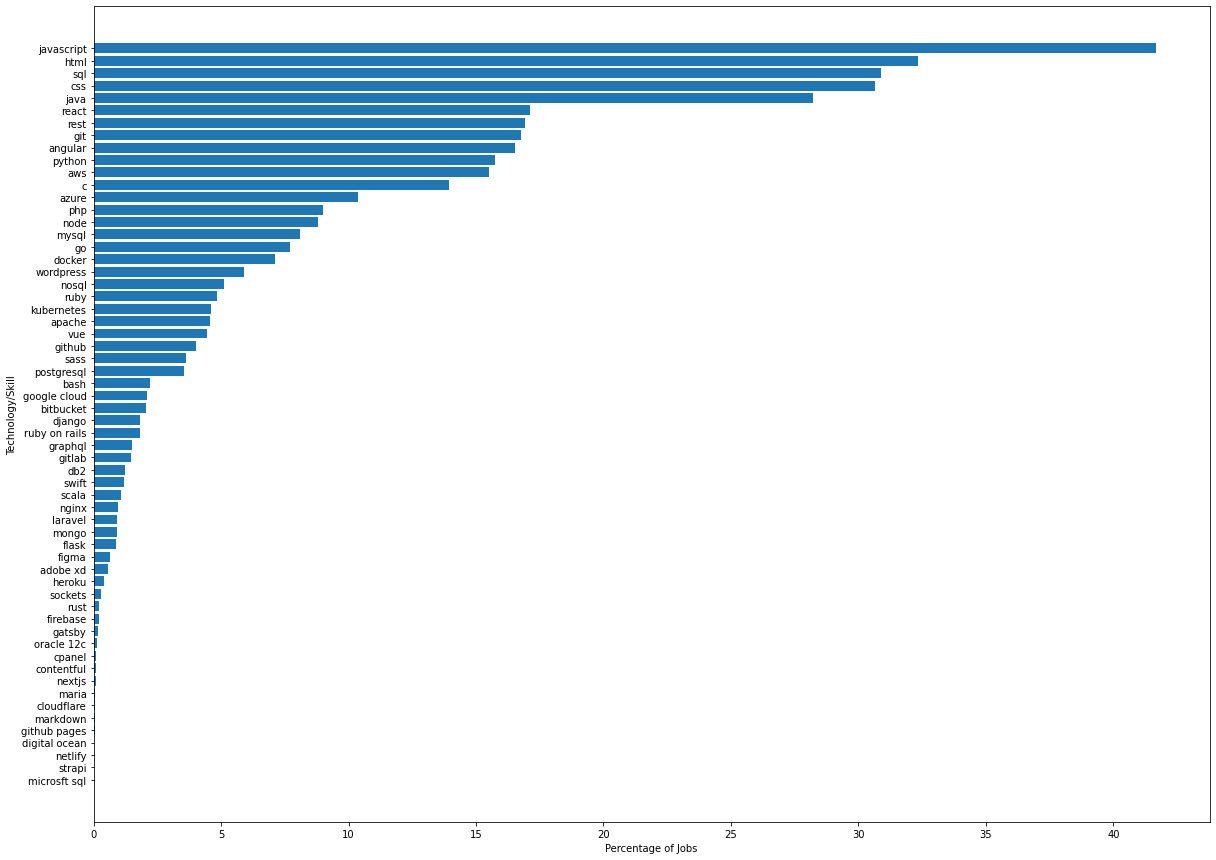

In [10]:
plt.figure(figsize=(20, 15))

plt.barh(df['Skill'], df['percentage'])
plt.xlabel("Percentage of Jobs")
plt.ylabel("Technology/Skill")

plt.show()

### By Platform

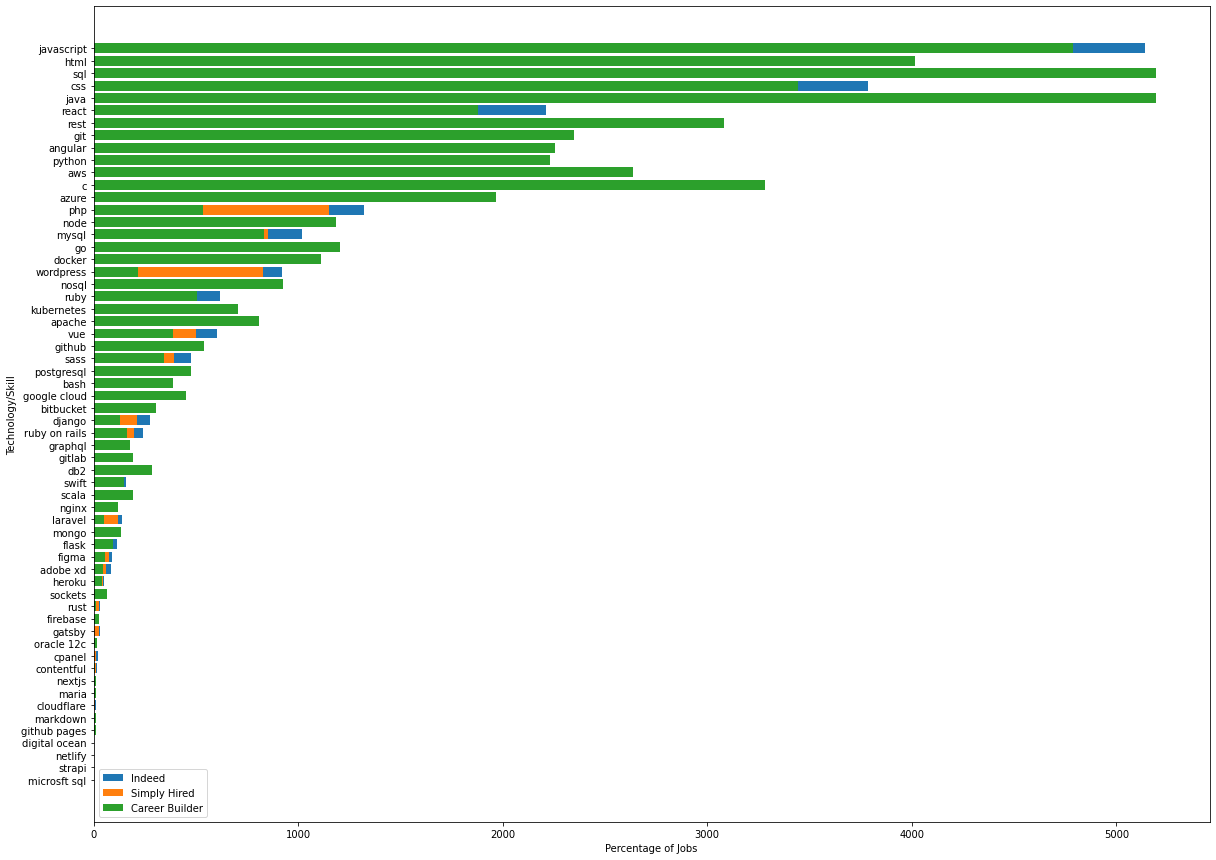

In [11]:
plt.figure(figsize=(20, 15))

plt.barh(df['Skill'], df['indeed'], label='Indeed')
plt.barh(df['Skill'], df['simply'], label='Simply Hired')
plt.barh(df['Skill'], df['career'], label='Career Builder')

plt.xlabel("Percentage of Jobs")
plt.ylabel("Technology/Skill")
plt.legend()

plt.show()

### Per Category

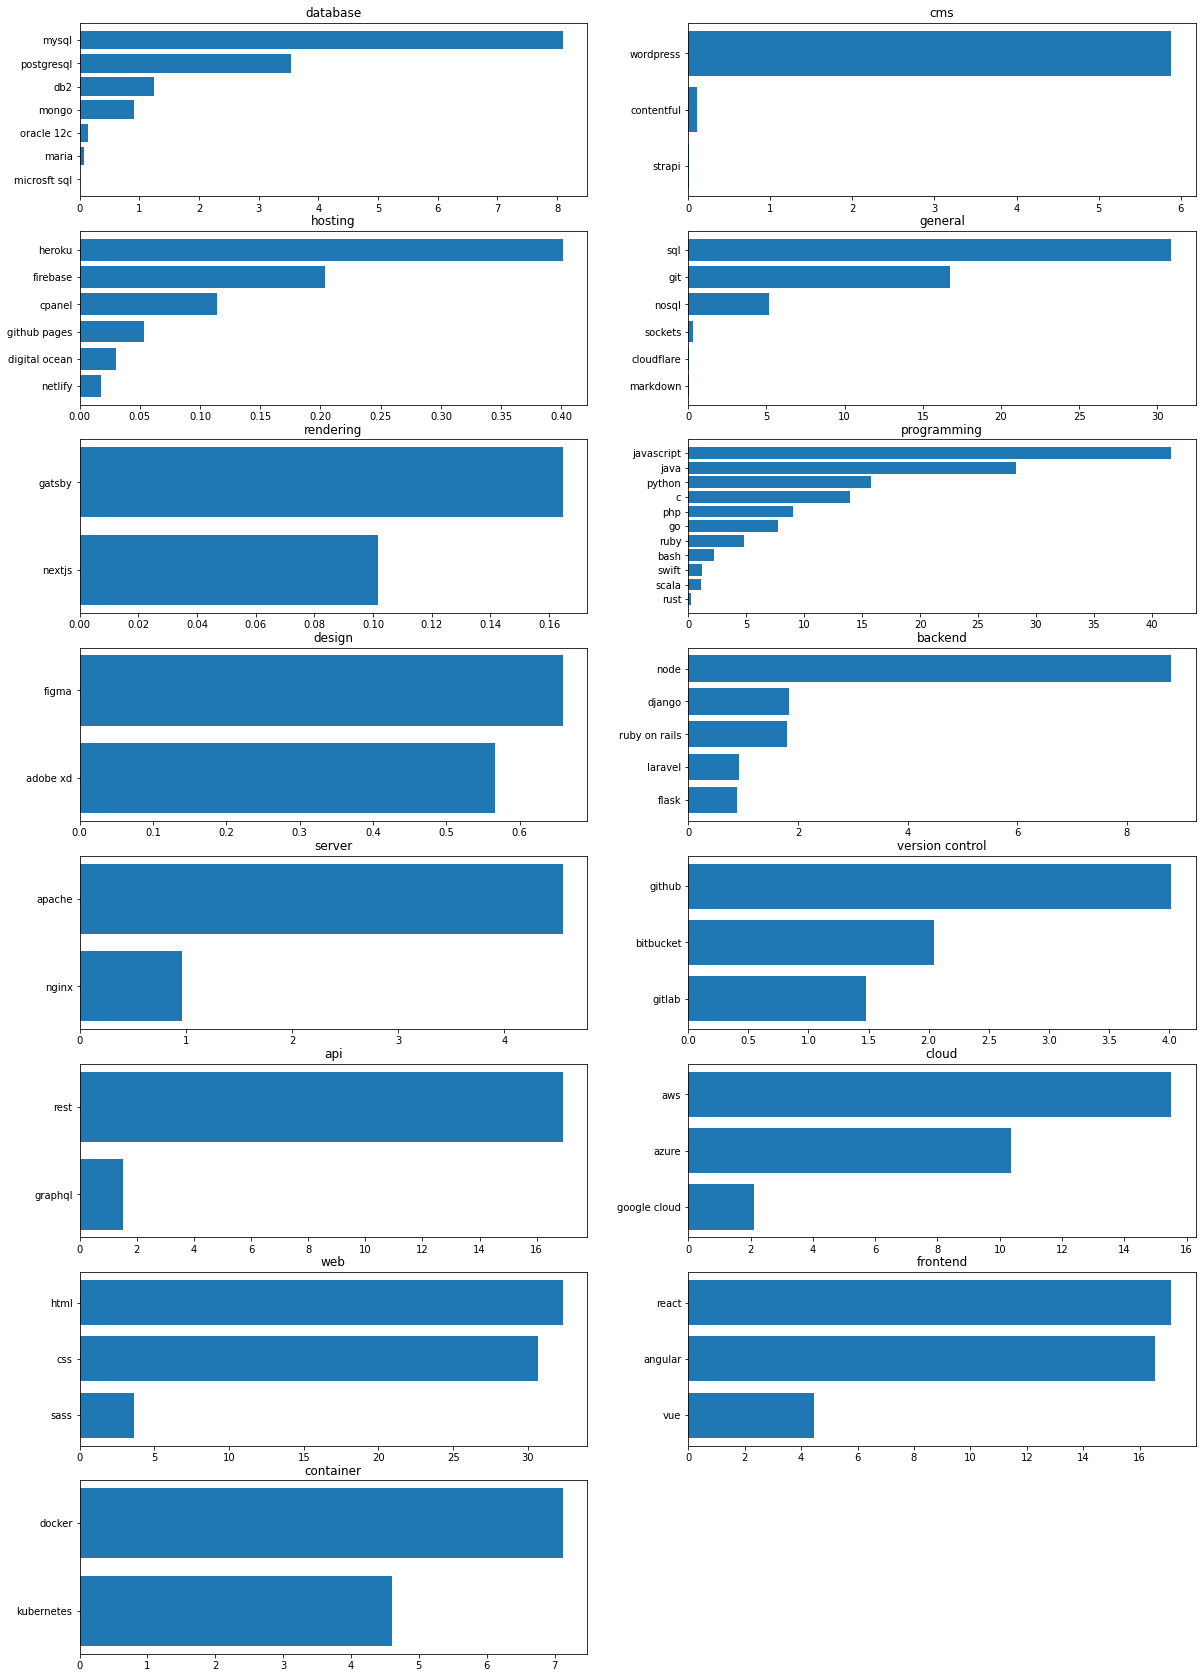

In [12]:
categories = df['Category'].unique()
plt.figure(figsize=(20, 30))

for i in range(len(categories)):
    #print(categories[i])
    data = df[df['Category'] == categories[i]]

    plt.subplot((len(categories)/2)+1,2,i+1)
    plt.barh(data['Skill'], data['percentage'])
    plt.title(categories[i])